Abhishek R

ashek6578@gmail.com

batch number : DS2310    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* from the above info observed that 'Cabin' and 'Age' column having the null values 
* so decided to drop the columns which are not necessary for the analysis

In [4]:
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin'] , axis = 1 )
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


* i encode the object values into numerical values in the column "Embarked" and "Sex"   >>>>>>>>>>

In [5]:
df= df.dropna(subset = ['Age'])

i found some null values in the "Age" column so droped those rows

In [6]:
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'female' else 1)

In [7]:
df['Embarked'] = df['Embarked'].apply(lambda x: 0 if x == 'S'  else (1 if x == 'C' else 3))

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,3
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
889,1,1,1,26.0,0,0,30.0000,1


<Axes: >

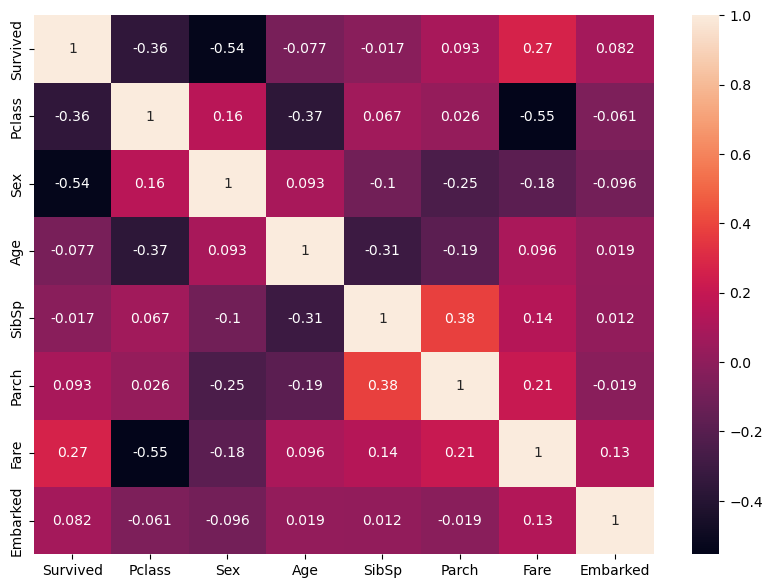

In [9]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

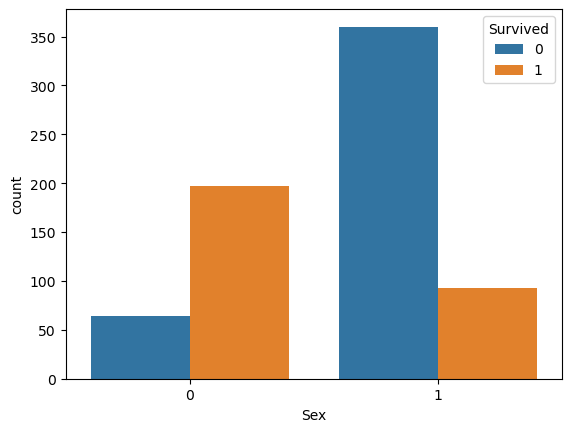

In [10]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

* i observed that death rate of the Male is greater than Female

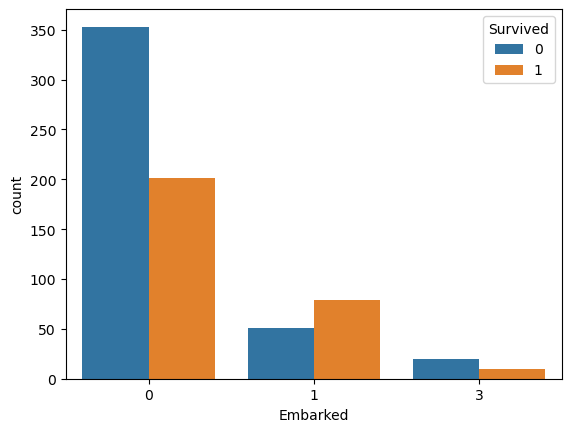

In [11]:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

from this plot i observed that
* the more passengers who embarked from "Southampton" port having more death rate and passengers embarked from "Queenstown" having less death rate.


In [17]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189,0.082129
Pclass,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.061458
Sex,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994,-0.096270
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.018616
SibSp,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329,0.011551
Parch,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119,-0.019028
Fare,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000,0.126581
Embarked,0.082129,-0.061458,-0.096270,0.018616,0.011551,-0.019028,0.126581,1.000000


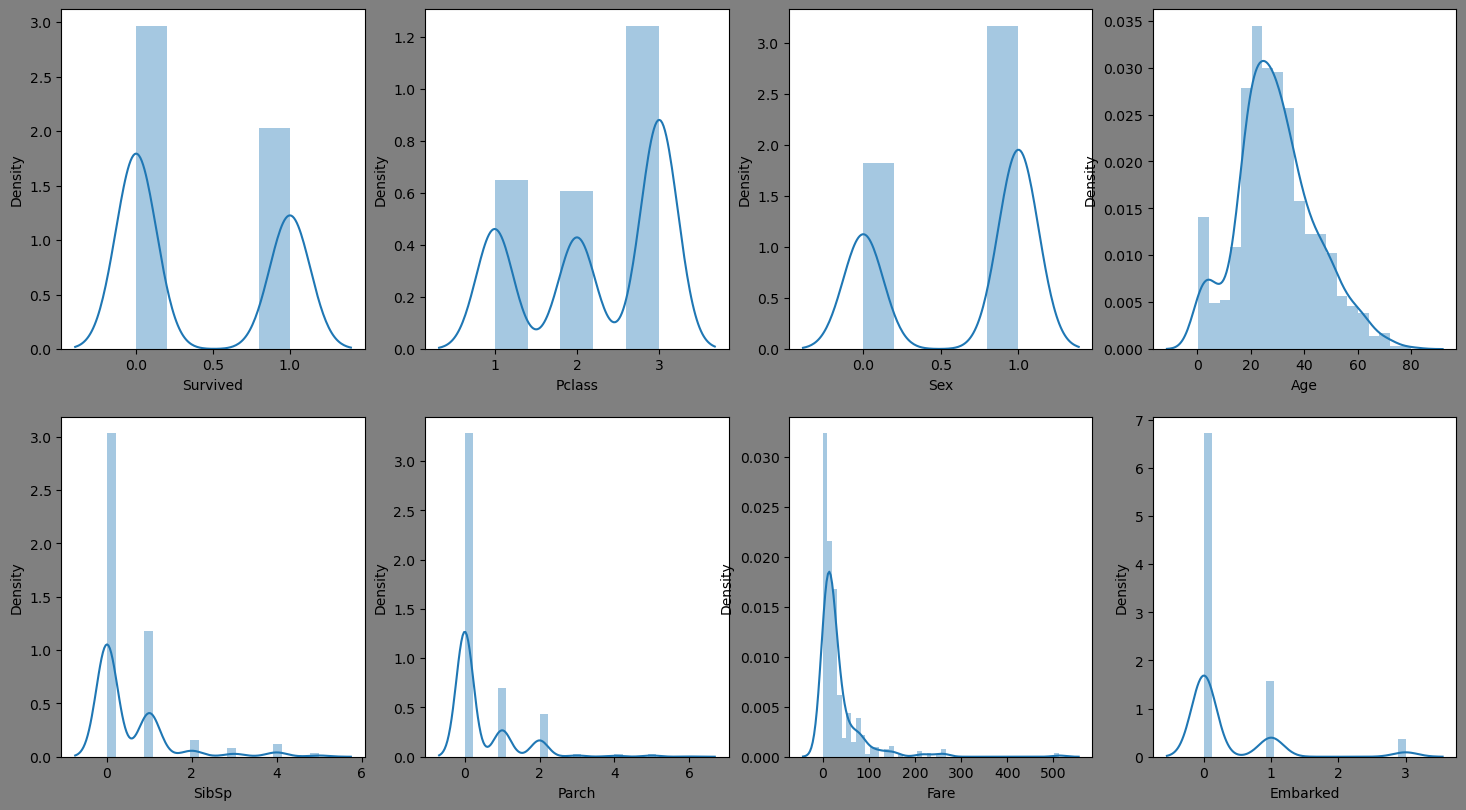

In [12]:
plt.figure(figsize = (18,15), facecolor= 'grey')
pn = 1
for i in df:
    if pn < 12:
        ax= plt.subplot(3,4, pn)
        sns.distplot(df[i])
        pn += 1

* rest of all the columns are categorical 
* 'Fare' column having is slightly skewed 

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,3,5
886,0,2,1,27.0,0,0,13.0000,0,0
887,1,1,0,19.0,0,0,30.0000,0,0
889,1,1,1,26.0,0,0,30.0000,1,0


In [14]:
df = df.drop(['SibSp','Parch'], axis = 1)

In [15]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

bfare =(q3.Fare + (1.5 * iqr.Fare))
fare = np.where(df['Fare'] > bfare)
fare
df =df.drop(df.index[fare])
df.shape
df.reset_index()

,index,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,0,3,1,22.0,7.2500,0,1
1,1,1,1,0,38.0,71.2833,1,1
2,2,1,3,0,26.0,7.9250,0,0
3,3,1,1,0,35.0,53.1000,0,1
4,4,0,3,1,35.0,8.0500,0,0
...,...,...,...,...,...,...,...,...
615,885,0,3,0,39.0,29.1250,3,5
616,886,0,2,1,27.0,13.0000,0,0
617,887,1,1,0,19.0,30.0000,0,0
618,889,1,1,1,26.0,30.0000,1,0


<Axes: >

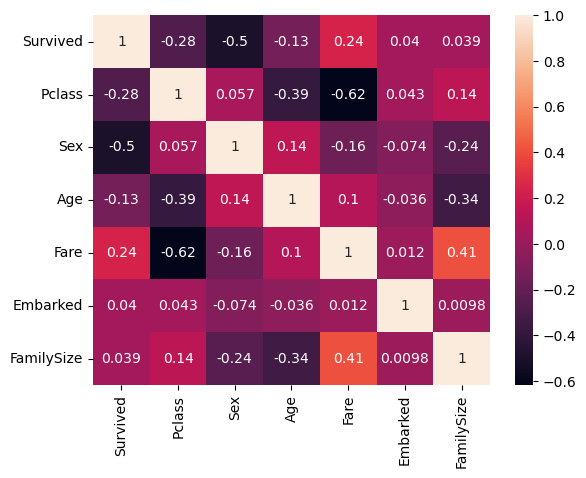

In [16]:
sns.heatmap(df.corr(), annot = True)

In [17]:
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [18]:
y.value_counts()

0    398
1    222
Name: Survived, dtype: int64

* i found that in the target column having imbalance in the samples 
* so i used the SMOTE to oversample these 

In [19]:
oversampler = SMOTE(sampling_strategy='minority')
xo, yo = oversampler.fit_resample(x, y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(xo, yo, test_size=0.2, random_state=94)

In [21]:
y_train.value_counts()

1    326
0    310
Name: Survived, dtype: int64

In [22]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [23]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 82.08%

 ============ test result ==========
test result is: 80.62%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 99.21%

 ============ test result ==========
test result is: 76.25%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 99.21%

 ============ test result ==========
test result is: 76.88%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 86.79%

 ============ test result ==========
test result is: 77.50%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 93.08%

 ============ test result ==========
test result is: 81.88%

================== SVC ==================

 ============ train result ===

* form these i observed that RandomForestClassifier and GradientBoostClassifier showing good performance 

In [24]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xo, yo, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.7375     0.79874214 0.78616352 0.9245283  0.83647799]
Mean Cross-Validation Score: 0.8166823899371071
Test Accuracy: 0.8063
Difference between Accuracy score and cross-validation ofLogisticRegression() score is -0.010432389937107045

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.725      0.75471698 0.81761006 0.8490566  0.85534591]
Mean Cross-Validation Score: 0.8003459119496854
Test Accuracy: 0.7562
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is -0.04409591194968543

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.73125    0.79245283 0.83018868 0.90566038 0.89308176]
Mean Cross-Validation Score: 0.8305267295597485
Test Accuracy: 0.7688
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is -0.061776729559748444

================== AdaBoost

* form these i observed that RandomForestClassifier and GradientBoostClassifier showing good performance 

* from the above result i decided to continue for hyperpara meter tuning with RFC and GBC models

In [25]:
good_grid = {'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [50, 100, 200],'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]}

In [26]:
gbc = GradientBoostingClassifier()
gs = GridSearchCV(gbc, good_grid, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [27]:
print(gs.best_params_)
gs.best_score_*100

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}


87.41815476190476

In [135]:
final = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=5 ,min_samples_split=5,
    n_estimators=50,subsample=0.8)

final.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=50, subsample=0.8)

In [136]:
pred1 = final.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)

81.875


In [137]:
import joblib
joblib.dump(final,'survive.pkl')

['survive.pkl']

In [138]:
model= joblib.load('survive.pkl')
pred0= model.predict(x_test)
ac = accuracy_score(pred0 , y_test)
ac*100

81.875